# KLS Exploratory Data Analysis

Last accessed December 6, 2020

First, we import the modules that we will need and the variables that we will use from the KLS_Data python script.

In [18]:
import pandas as pd
import numpy as np
from KLS_Data import name_set_list, blamed_list, karachi_ls_df, kls_df

There does not appear to be any inconsistency in the data.

In [19]:
kls_df.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Tweeter0 to Tweeter73
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Karachi Electric  74 non-null     int64
 1   Imran Khan        74 non-null     int64
 2   Asad Umar         74 non-null     int64
 3   NEPRA             74 non-null     int64
 4   Sui Gas           74 non-null     int64
 5   Naeem Rehman      74 non-null     int64
 6   Omar Ayub Khan    74 non-null     int64
 7   Tehreeki Insaaf   74 non-null     int64
dtypes: int64(8)
memory usage: 7.7+ KB


There are a few instances in the data where entities were just blamed a few times.  Four entities are sticking out with the highest percentage of tweets blaming them compared to tweets not blaming them: Karachi Electric, NEPRA, Sui Gas, and Tehreeki Insaaf.

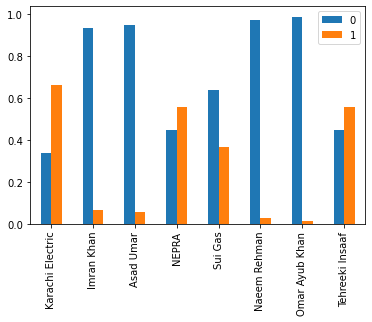

In [20]:
blamed_percent = pd.DataFrame([kls_df.loc[blamed].value_counts\
                               (normalize = True) for blamed in kls_df.T])
blamed_percent.plot.bar()

This code finds the number of times the entities were blamed in the new search.

In [21]:
# Find the length of the name_set_list
name_set_lengths = name_set_length_lister(name_set_list)

# Create a dictionary of the blamed entities and the number of times each entity is blamed
blamed_dict = dict(zip(blamed_list, name_set_lengths))
print(blamed_dict)

{'Karachi Electric': 15, 'Imran Khan': 0, 'Asad Umar': 0, 'NEPRA': 15, 'Sui Gas': 1, 'Naeem Rehman': 0, 'Omar Ayub Khan': 0, 'Tehreeki Insaaf': 15}


This code finds the percentage of times the entities were blamed in the new search.

In [22]:
# Create a pandas Series out of the dictionary
times_blamed = pd.Series(blamed_dict)

new_search_percentage = pd.Series(times_blamed.values/len(karachi_ls_df.columns))
new_search_percentage

0    1.000000
1    0.000000
2    0.000000
3    1.000000
4    0.066667
5    0.000000
6    0.000000
7    1.000000
dtype: float64

We can see some telling differences in the percentage of times the entities were blamed overall and the percentage of times the entities were blamed in the new search.  With the exception of Sui Gas, all of the entities with high percentages of blames received a higher percentage of blames in the new search relative to the overall search.  This anomaly can probably be explained by a large protest against load-shedding in Karachi when the initial searches were conducted, which helped to distribute the blames differently. 

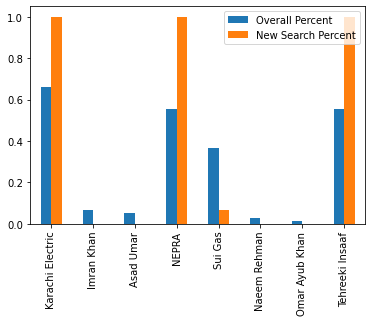

In [23]:
blamed_percent['new_search_percentage'] = new_search_percentage.values
blamed_percent = blamed_percent.drop(columns = 0)
blamed_percent.columns = ['Overall Percent', 'New Search Percent']
blamed_percent.plot.bar()

This dataset contains 175 total blames and the average number of times the entities have been blamed in the dataset is about 22.

In [24]:
# Print the total and average of the times_blamed Series

blamed_num = pd.DataFrame([kls_df.loc[blamed].value_counts\
                               () for blamed in kls_df.T])

print(f'The total times all entities in the dataset have been blamed for load shedding in Karachi, Pakistan is {sum(blamed_num[1])}.')
print(f'The average number of times the entities in the dataset have been blamed for load shedding in Karachi, Pakistan is {np.mean(blamed_num[1])}.')


The total times all entities in the dataset have been blamed for load shedding in Karachi, Pakistan is 170.
The average number of times the entities in the dataset have been blamed for load shedding in Karachi, Pakistan is 21.25.


The dataset is not normalized.

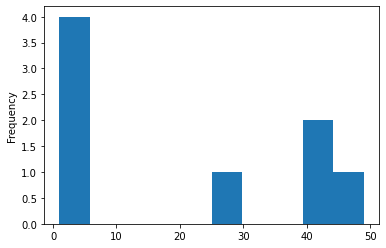

In [25]:
# Plot a histogram of the times_blamed Series
blamed_num[1].plot.hist()

If we remove the entities that were blamed less than 25% of the time, our dataset becomes much more normalized.

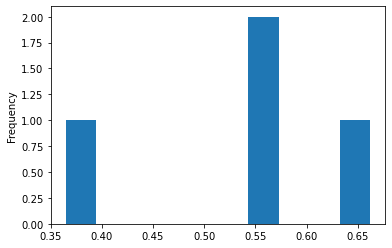

In [26]:
# Drop a few rows of the times_blamed Series to make it more normalized
blamed_percent.drop(blamed_percent[blamed_percent['Overall Percent']\
                                   < 0.25].index, inplace = True)
blamed_percent['Overall Percent'].plot.hist()

The entity with the highest percentage of the blames is Karachi Electric, followed by NEPRA and Tehreeki Insaaf. Due to the anomaly of Sui Gas being blamed less after the large protest, Sui Gas has a lower overall percentage of the blames than the other entities who were blamed the most.

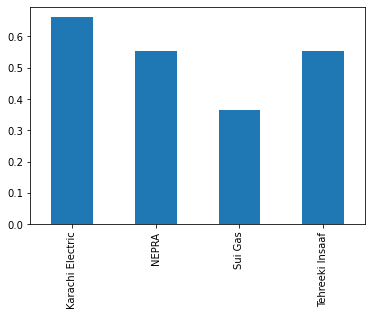

In [27]:
# Plot a bar chart for the times_blamed Series
blamed_percent['Overall Percent'].plot.bar(legend = False)

In this cell, we are taking a sample of 10 columns.

In [28]:
# Create a separate dataframe consisting of 10 random samples of the columns
sample_kls_df = kls_df.sample(n=10, axis=1)

In this cell, we find the False/True value counts of the sample.

In [29]:
# Find a count of all True values and all False values in the sample
unique_sample = np.unique(sample_kls_df, return_counts = True)
print(unique_sample)

(array([0, 1]), array([54, 26], dtype=int64))


According to the sample, it is much more likely for an entity not to be blamed than for it to be blamed.

[Text(0, 0.5, 'Occurences in sample'), Text(0.5, 0, 'True/False')]

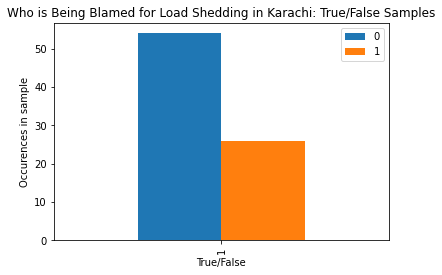

In [30]:
# Create a dataframe out of the True/False numpy array
unique_sample_df = pd.DataFrame(unique_sample)

# Rename the columns after the first row
unique_sample_df.rename(columns=unique_sample_df.iloc[0], inplace = True)

# Remove the old first row
unique_sample_df.drop([0], inplace = True)

# Create a bar chart out of the False/True sample
ax = unique_sample_df.plot.bar(title = 'Who is Being Blamed for Load Shedding in Karachi: True/False Samples')
ax.set(xlabel = 'True/False', ylabel = 'Occurences in sample')

In this cell, we find the unique False/True values of all entities in the dataset. 

In [31]:
# Find who is being blamed the most
def who_is_to_blame(alist, df):
    '''Iterates over a list and prints the item in the list followed by 
    unique counts in a numpy array.'''
    for b in alist:
        array = f'{b}:', np.unique(df.loc[b], return_counts = True)
        print(array)

who_is_to_blame(blamed_list, kls_df)

('Karachi Electric:', (array([0, 1], dtype=int64), array([25, 49], dtype=int64)))
('Imran Khan:', (array([0, 1], dtype=int64), array([69,  5], dtype=int64)))
('Asad Umar:', (array([0, 1], dtype=int64), array([70,  4], dtype=int64)))
('NEPRA:', (array([0, 1], dtype=int64), array([33, 41], dtype=int64)))
('Sui Gas:', (array([0, 1], dtype=int64), array([47, 27], dtype=int64)))
('Naeem Rehman:', (array([0, 1], dtype=int64), array([72,  2], dtype=int64)))
('Omar Ayub Khan:', (array([0, 1], dtype=int64), array([73,  1], dtype=int64)))
('Tehreeki Insaaf:', (array([0, 1], dtype=int64), array([33, 41], dtype=int64)))


We now construct a new DataFrame by explicitly dropping the entities that have not been blamed enough.

In [32]:
# Create a new dataframe with only the entities that we want
new_kls_df = kls_df.drop('Imran Khan').drop('Asad Umar').drop('Naeem Rehman').drop('Omar Ayub Khan')
new_kls_df

,Tweeter0,Tweeter1,Tweeter2,Tweeter3,Tweeter4,Tweeter5,Tweeter6,Tweeter7,Tweeter8,Tweeter9,...,Tweeter64,Tweeter65,Tweeter66,Tweeter67,Tweeter68,Tweeter69,Tweeter70,Tweeter71,Tweeter72,Tweeter73
Blamed,,,,,,,,,,,,,,,,,,,,,
Karachi Electric,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
NEPRA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sui Gas,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tehreeki Insaaf,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In this cell, we remove some of the noise from the previous who_is_to_blame function to see the differences in the number of False and True values. 

In [33]:
new_blamed_list = ['Karachi Electric', 'NEPRA', 'Sui Gas', 'Tehreeki Insaaf']

# Call who_is_to_blame function on the new list and dataframe
who_is_to_blame(new_blamed_list, new_kls_df)

('Karachi Electric:', (array([0, 1], dtype=int64), array([25, 49], dtype=int64)))
('NEPRA:', (array([0, 1], dtype=int64), array([33, 41], dtype=int64)))
('Sui Gas:', (array([0, 1], dtype=int64), array([47, 27], dtype=int64)))
('Tehreeki Insaaf:', (array([0, 1], dtype=int64), array([33, 41], dtype=int64)))
